# F-Log to Scene Linear 1D LUT Generation

## Define F-Log to Scene Linear Function
Here we implement the Fujifilm F-Log to scene linear gamma conversion function as defined in the [F-Log DataSheet](https://www.fujifilm.com/support/digital_cameras/software/lut/pdf/F-Log_DataSheet_E_Ver.1.0.pdf)

In [1]:
import math

def flog_to_scene_linear(value_in):
    """
    F-Log to scene linear gamma conversion
    Based on information referenced from F-Log DataSheet E Version 1.0
    https://www.fujifilm.com/support/digital_cameras/software/lut/pdf/F-Log_DataSheet_E_Ver.1.0.pdf
    """
    a = 0.555556
    b = 0.009468
    c = 0.344676
    d = 0.790453
    e = 8.735631
    f = 0.092864 
    cut2 = 0.100537775223865

    out = 0
    if value_in >= cut2:
        out = math.pow(10, (value_in - d)/c)/a - b/a
    else:
        out = (value_in - f)/e
    return out

## Plot Curve
Here we check the function implementation and verify it plots as expected across the 0 - 1 domain

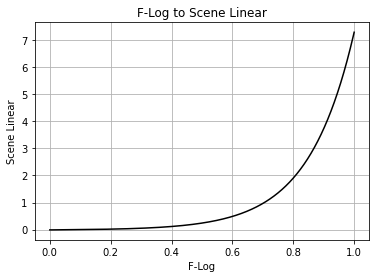

In [2]:
import numpy
import matplotlib.pyplot as plt

samples = numpy.linspace(0,1,4096)
values = [flog_to_scene_linear(sample) for sample in samples]
plt.xlabel("F-Log")
plt.ylabel("Scene Linear")
plt.title("F-Log to Scene Linear")
plt.grid(True)
plt.plot(samples, values, color="black")

## Generate 1D Cube LUT
Here we generate a 1D [cube LUT](https://wwwimages2.adobe.com/content/dam/acom/en/products/speedgrade/cc/pdfs/cube-lut-specification-1.0.pdf) file and write it to disk

In [3]:
lut_template = """TITLE "F-Log to Scene Linear"
DOMAIN_MIN 0 0 0
DOMAIN_MAX 1 1 1
LUT_1D_SIZE {size}"""

def generate_lut_data(lut_size=4096):
    """
    Generate formatted cube lut data
    """
    lut_data = lut_template.format(size=lut_size)
    samples = numpy.linspace(0,1,lut_size)
    for sample in samples:
        value = flog_to_scene_linear(sample)
        lut_data += "\n{} {} {}".format(value, value, value)
    return lut_data

def write_cube_file(lut_data, output_file_path = "luts/flog_to_linear.cube"):
    with open(output_file_path, "w") as cube_file:
        cube_file.write(lut_data)
    print("Wrote file {}".format(output_file_path))
        

write_cube_file(generate_lut_data())

Wrote file luts/flog_to_linear.cube
